In [2]:
print("Opsium Competition");
print("AI-Driven Demand Forecasting & Capacity Optimization for FedEx Tricolor");

Opsium Competition
AI-Driven Demand Forecasting & Capacity Optimization for FedEx Tricolor


In [3]:
import pandas as pd

demand_df = pd.read_csv("data/customer_sku_demand_signals.csv")
forecast_df = pd.read_csv("data/forecasted_demand_output.csv")
capacity_df = pd.read_csv("data/tricolor_flight_capacity.csv")
print("Data Loaded Successfully");

Data Loaded Successfully


In [4]:
print("===== CUSTOMER–SKU DEMAND SIGNALS DATASET =====")
display(demand_df.head())
display(demand_df.describe())

===== CUSTOMER–SKU DEMAND SIGNALS DATASET =====


,customer_id,sku_id,route,time_period,base_demand,promotion_flag,discount_percentage,sentiment_score,review_volume,sustainable_sku_flag,regulation_impact_score,eco_preference_index
0,CUST_1,SKU_1,DEL-MUM,2025-01-31,71,1,10,0.56,30,0,-0.12,0.06
1,CUST_1,SKU_1,DEL-MUM,2025-02-28,43,0,20,0.94,201,1,0.11,0.61
2,CUST_1,SKU_1,DEL-MUM,2025-03-31,68,0,9,-0.91,197,0,0.03,0.79
3,CUST_1,SKU_1,DEL-MUM,2025-04-30,70,0,19,0.18,140,1,0.14,0.45
4,CUST_1,SKU_1,DEL-MUM,2025-05-31,37,1,27,0.13,274,0,-0.08,0.24


,base_demand,promotion_flag,discount_percentage,sentiment_score,review_volume,sustainable_sku_flag,regulation_impact_score,eco_preference_index
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,59.747583,0.295500,14.544917,0.000443,154.806000,0.408500,0.049715,0.500236
std,23.129857,0.456286,8.629824,0.579636,83.715083,0.491577,0.144504,0.287410
min,20.000000,0.000000,0.000000,-1.000000,10.000000,0.000000,-0.200000,0.000000
25%,40.000000,0.000000,7.000000,-0.500000,83.000000,0.000000,-0.080000,0.250000
50%,60.000000,0.000000,15.000000,-0.000000,154.000000,0.000000,0.050000,0.500000
75%,80.000000,1.000000,22.000000,0.510000,229.000000,1.000000,0.180000,0.750000
max,99.000000,1.000000,29.000000,1.000000,299.000000,1.000000,0.300000,1.000000


## Initial Dataset Inspection
Used head() and describe() to validate dataset structure and distributions.


In [5]:
print("\n===== FORECASTED DEMAND DATASET =====")
display(forecast_df.head())
display(forecast_df[["forecasted_demand", "forecast_confidence"]].describe())


===== FORECASTED DEMAND DATASET =====


,customer_id,sku_id,route,time_period,base_demand,promotion_flag,discount_percentage,sentiment_score,review_volume,sustainable_sku_flag,regulation_impact_score,eco_preference_index,forecasted_demand,forecast_confidence
0,CUST_1,SKU_1,DEL-MUM,2025-01-31,71,1,10,0.56,30,0,-0.12,0.06,103.0,0.87
1,CUST_1,SKU_1,DEL-MUM,2025-02-28,43,0,20,0.94,201,1,0.11,0.61,54.0,0.86
2,CUST_1,SKU_1,DEL-MUM,2025-03-31,68,0,9,-0.91,197,0,0.03,0.79,60.0,0.62
3,CUST_1,SKU_1,DEL-MUM,2025-04-30,70,0,19,0.18,140,1,0.14,0.45,76.0,0.88
4,CUST_1,SKU_1,DEL-MUM,2025-05-31,37,1,27,0.13,274,0,-0.08,0.24,51.0,0.82


,forecasted_demand,forecast_confidence
count,12000.000000,12000.000000
mean,68.292583,0.774841
std,29.348877,0.100820
min,16.000000,0.600000
25%,44.000000,0.690000
50%,67.000000,0.780000
75%,89.000000,0.860000
max,164.000000,0.950000


In [6]:
print("\n===== TRICOLOR FLIGHT CAPACITY DATASET =====")
display(capacity_df.head())
display(capacity_df.describe())


===== TRICOLOR FLIGHT CAPACITY DATASET =====


,flight_id,route,max_capacity,fixed_cost,variable_cost_per_unit,real_time_update_flag,delay_risk_score
0,FL_DEL-MUM_1,DEL-MUM,846,91780,64,0,0.15
1,FL_DEL-MUM_2,DEL-MUM,519,80928,57,0,0.09
2,FL_DEL-MUM_3,DEL-MUM,863,107135,59,0,0.08
3,FL_DEL-MUM_4,DEL-MUM,574,111327,68,1,0.16
4,FL_DEL-MUM_5,DEL-MUM,603,62838,58,0,0.24


,max_capacity,fixed_cost,variable_cost_per_unit,real_time_update_flag,delay_risk_score
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,774.760000,86134.120000,88.200000,0.360000,0.180000
std,189.377991,22290.767398,22.507406,0.489898,0.072053
min,519.000000,55665.000000,55.000000,0.000000,0.020000
25%,612.000000,62838.000000,68.000000,0.000000,0.140000
50%,762.000000,84074.000000,94.000000,0.000000,0.200000
75%,912.000000,106784.000000,111.000000,1.000000,0.230000
max,1124.000000,118422.000000,118.000000,1.000000,0.290000


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

promo_demand = (
    demand_df
    .groupby("promotion_flag")["base_demand"]
    .mean()
    .reset_index()
)

promo_demand["promotion_flag"] = promo_demand["promotion_flag"].map(
    {0: "No Promotion", 1: "Promotion"}
)

promo_demand


,promotion_flag,base_demand
0,No Promotion,59.765200
1,Promotion,59.705584


In [8]:
promo_demand = (
    forecast_df
    .groupby("promotion_flag")["forecasted_demand"]
    .mean()
    .reset_index()
)

promo_demand["promotion_flag"] = promo_demand["promotion_flag"].map(
    {0: "No Promotion", 1: "Promotion"}
)

promo_demand


,promotion_flag,forecasted_demand
0,No Promotion,62.771469
1,Promotion,81.455443


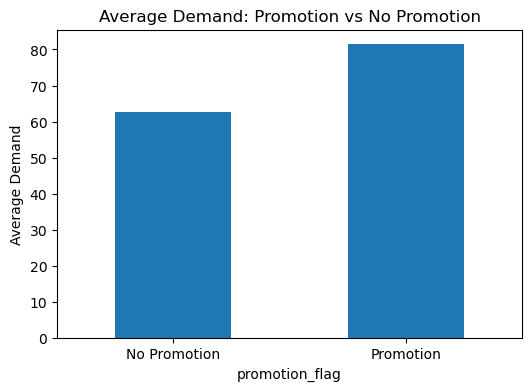

In [9]:
promo_demand.set_index("promotion_flag").plot(
    kind="bar",
    figsize=(6,4),
    title="Average Demand: Promotion vs No Promotion",
    legend=False
)

plt.ylabel("Average Demand")
plt.xticks(rotation=0)
plt.show()


In [10]:
promo_volatility = (
    demand_df
    .groupby("promotion_flag")["base_demand"]
    .std()
    .reset_index()
)

promo_volatility["promotion_flag"] = promo_volatility["promotion_flag"].map(
    {0: "No Promotion", 1: "Promotion"}
)

promo_volatility


,promotion_flag,base_demand
0,No Promotion,23.013153
1,Promotion,23.408958


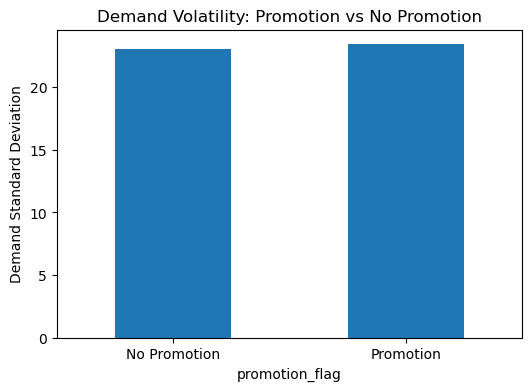

In [12]:
promo_volatility.set_index("promotion_flag").plot(
    kind="bar",
    figsize=(6,4),
    title="Demand Volatility: Promotion vs No Promotion",
    legend=False
)

plt.ylabel("Demand Standard Deviation")
plt.xticks(rotation=0)
plt.show()


C:\Users\Partha\AppData\Local\Temp\ipykernel_9116\1366009791.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(pd.cut(demand_df["discount_percentage"], bins=[0,10,20,30]))["base_demand"]


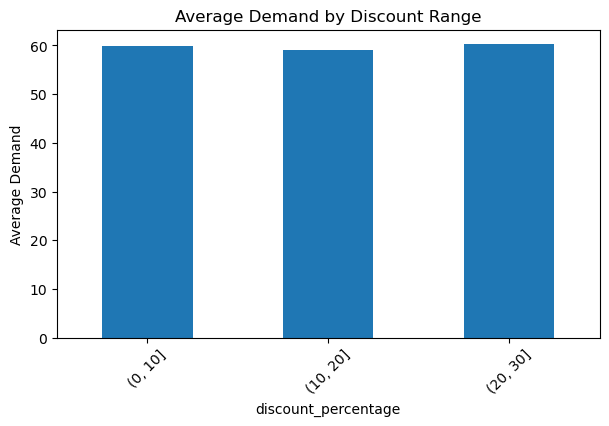

In [13]:
discount_analysis = (
    demand_df[demand_df["promotion_flag"] == 1]
    .groupby(pd.cut(demand_df["discount_percentage"], bins=[0,10,20,30]))["base_demand"]
    .mean()
)

discount_analysis.plot(
    kind="bar",
    figsize=(7,4),
    title="Average Demand by Discount Range"
)

plt.ylabel("Average Demand")
plt.xticks(rotation=45)
plt.show()


C:\Users\Partha\AppData\Local\Temp\ipykernel_9116\1346208769.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("discount_bucket")["forecasted_demand"]


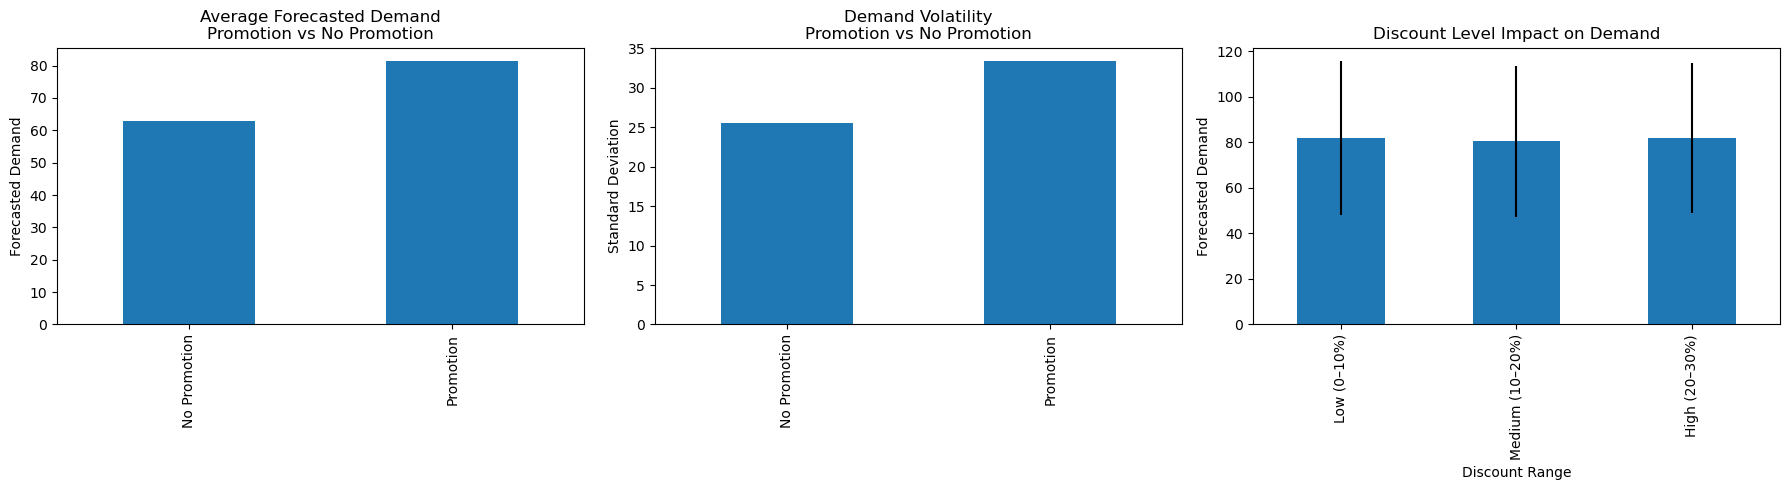

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------
# 1. Promotion impact on forecasted demand
# -------------------------------
promo_forecast = (
    forecast_df
    .groupby("promotion_flag")["forecasted_demand"]
    .agg(["mean", "std"])
    .reset_index()
)

promo_forecast["promotion_flag"] = promo_forecast["promotion_flag"].map(
    {0: "No Promotion", 1: "Promotion"}
)

# -------------------------------
# 2. Discount impact on forecasted demand (only promoted cases)
# -------------------------------
discount_forecast = (
    forecast_df[forecast_df["promotion_flag"] == 1]
    .assign(discount_bucket=pd.cut(
        forecast_df[forecast_df["promotion_flag"] == 1]["discount_percentage"],
        bins=[0, 10, 20, 30],
        labels=["Low (0–10%)", "Medium (10–20%)", "High (20–30%)"]
    ))
    .groupby("discount_bucket")["forecasted_demand"]
    .agg(["mean", "std"])
)

# -------------------------------
# 3. Visualization
# -------------------------------
fig, axes = plt.subplots(1, 3, figsize=(18,5))

# Chart 1: Promotion vs No Promotion (Mean)
promo_forecast.set_index("promotion_flag")["mean"].plot(
    kind="bar", ax=axes[0], title="Average Forecasted Demand\nPromotion vs No Promotion", legend=False
)
axes[0].set_ylabel("Forecasted Demand")
axes[0].set_xlabel("")

# Chart 2: Promotion vs No Promotion (Volatility)
promo_forecast.set_index("promotion_flag")["std"].plot(
    kind="bar", ax=axes[1], title="Demand Volatility\nPromotion vs No Promotion", legend=False
)
axes[1].set_ylabel("Standard Deviation")
axes[1].set_xlabel("")

# Chart 3: Discount impact (Mean + Volatility)
discount_forecast["mean"].plot(
    kind="bar", ax=axes[2], title="Discount Level Impact on Demand", yerr=discount_forecast["std"]
)
axes[2].set_ylabel("Forecasted Demand")
axes[2].set_xlabel("Discount Range")

plt.tight_layout()
plt.show()


C:\Users\Partha\AppData\Local\Temp\ipykernel_9116\604486202.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=order, showfliers=True)


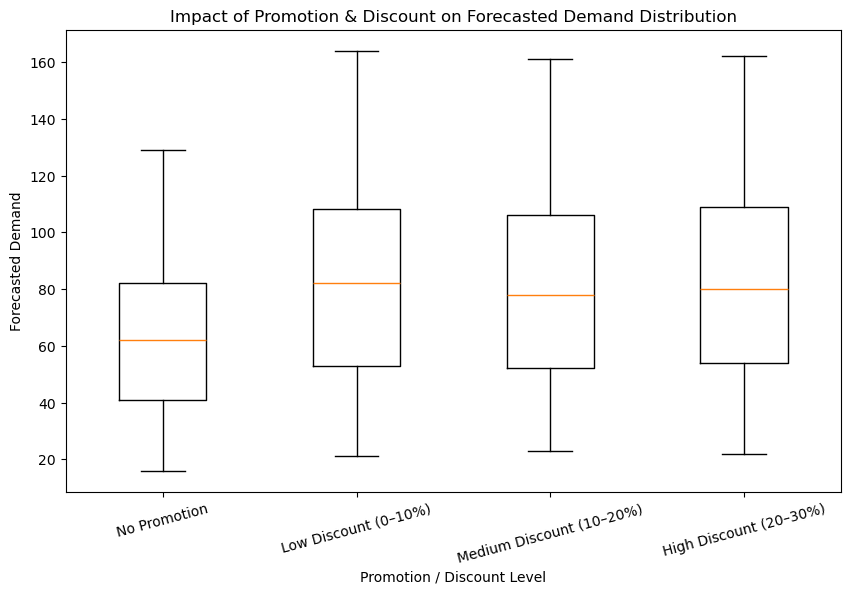

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Create discount categories including no promotion
forecast_df["discount_category"] = "No Promotion"

forecast_df.loc[
    (forecast_df["promotion_flag"] == 1) & (forecast_df["discount_percentage"] <= 10),
    "discount_category"
] = "Low Discount (0–10%)"

forecast_df.loc[
    (forecast_df["promotion_flag"] == 1) & (forecast_df["discount_percentage"] > 10) &
    (forecast_df["discount_percentage"] <= 20),
    "discount_category"
] = "Medium Discount (10–20%)"

forecast_df.loc[
    (forecast_df["promotion_flag"] == 1) & (forecast_df["discount_percentage"] > 20),
    "discount_category"
] = "High Discount (20–30%)"

# Order categories for clear pattern
order = [
    "No Promotion",
    "Low Discount (0–10%)",
    "Medium Discount (10–20%)",
    "High Discount (20–30%)"
]

# Prepare data for box plot
data_to_plot = [
    forecast_df[forecast_df["discount_category"] == cat]["forecasted_demand"]
    for cat in order
]

# Plot
plt.figure(figsize=(10,6))
plt.boxplot(data_to_plot, labels=order, showfliers=True)
plt.title("Impact of Promotion & Discount on Forecasted Demand Distribution")
plt.ylabel("Forecasted Demand")
plt.xlabel("Promotion / Discount Level")
plt.xticks(rotation=15)
plt.show()


C:\Users\Partha\AppData\Local\Temp\ipykernel_9116\604486202.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=order, showfliers=True)


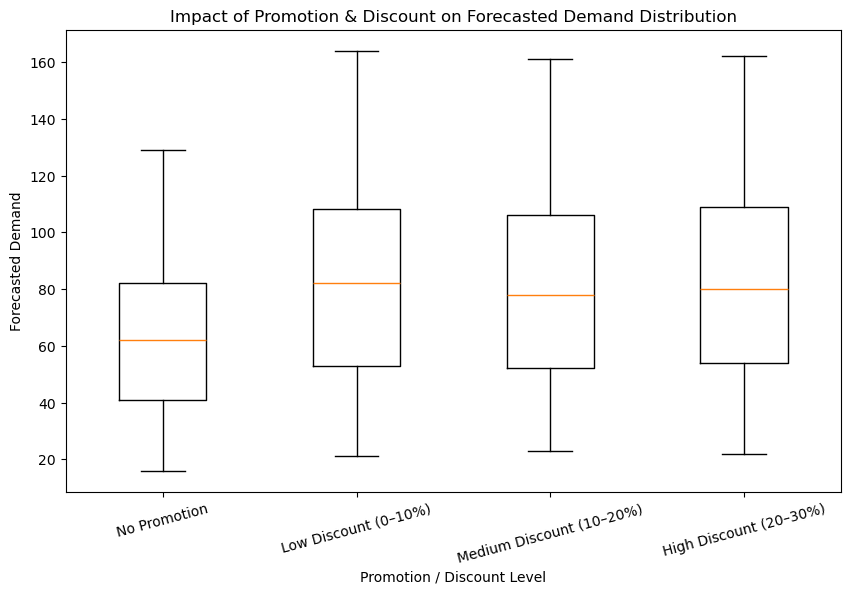

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Create discount categories including no promotion
forecast_df["discount_category"] = "No Promotion"

forecast_df.loc[
    (forecast_df["promotion_flag"] == 1) & (forecast_df["discount_percentage"] <= 10),
    "discount_category"
] = "Low Discount (0–10%)"

forecast_df.loc[
    (forecast_df["promotion_flag"] == 1) & (forecast_df["discount_percentage"] > 10) &
    (forecast_df["discount_percentage"] <= 20),
    "discount_category"
] = "Medium Discount (10–20%)"

forecast_df.loc[
    (forecast_df["promotion_flag"] == 1) & (forecast_df["discount_percentage"] > 20),
    "discount_category"
] = "High Discount (20–30%)"

# Order categories for clear pattern
order = [
    "No Promotion",
    "Low Discount (0–10%)",
    "Medium Discount (10–20%)",
    "High Discount (20–30%)"
]

# Prepare data for box plot
data_to_plot = [
    forecast_df[forecast_df["discount_category"] == cat]["forecasted_demand"]
    for cat in order
]

# Plot
plt.figure(figsize=(10,6))
plt.boxplot(data_to_plot, labels=order, showfliers=True)
plt.title("Impact of Promotion & Discount on Forecasted Demand Distribution")
plt.ylabel("Forecasted Demand")
plt.xlabel("Promotion / Discount Level")
plt.xticks(rotation=15)
plt.show()


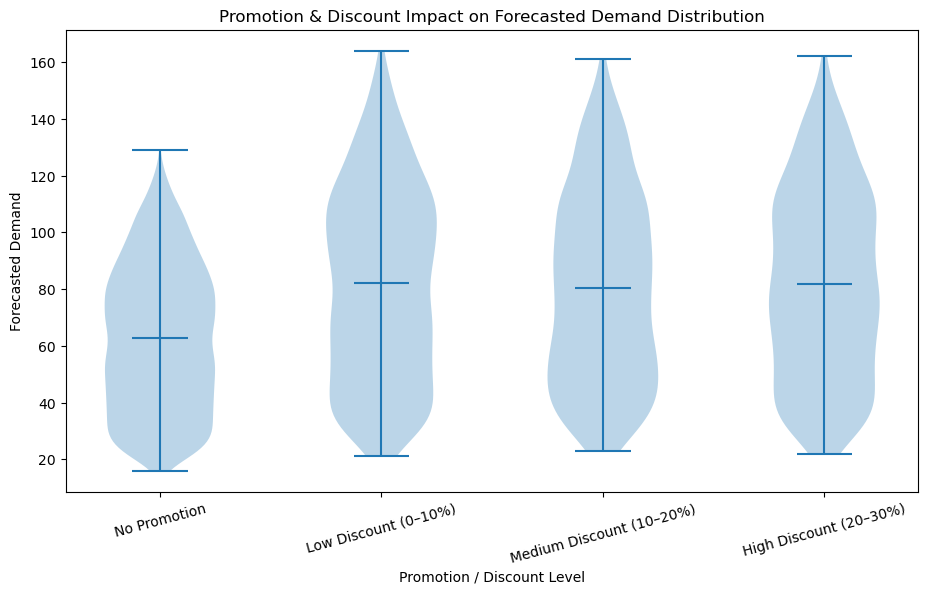

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Create discount categories
forecast_df["discount_category"] = "No Promotion"

forecast_df.loc[
    (forecast_df["promotion_flag"] == 1) & (forecast_df["discount_percentage"] <= 10),
    "discount_category"
] = "Low Discount (0–10%)"

forecast_df.loc[
    (forecast_df["promotion_flag"] == 1) & 
    (forecast_df["discount_percentage"] > 10) & 
    (forecast_df["discount_percentage"] <= 20),
    "discount_category"
] = "Medium Discount (10–20%)"

forecast_df.loc[
    (forecast_df["promotion_flag"] == 1) & (forecast_df["discount_percentage"] > 20),
    "discount_category"
] = "High Discount (20–30%)"

order = [
    "No Promotion",
    "Low Discount (0–10%)",
    "Medium Discount (10–20%)",
    "High Discount (20–30%)"
]

# Prepare data
data = [
    forecast_df[forecast_df["discount_category"] == cat]["forecasted_demand"]
    for cat in order
]

# Plot violin chart
plt.figure(figsize=(11,6))
plt.violinplot(data, showmeans=True, showextrema=True)

plt.xticks(range(1, len(order)+1), order, rotation=15)
plt.ylabel("Forecasted Demand")
plt.xlabel("Promotion / Discount Level")
plt.title("Promotion & Discount Impact on Forecasted Demand Distribution")

plt.show()


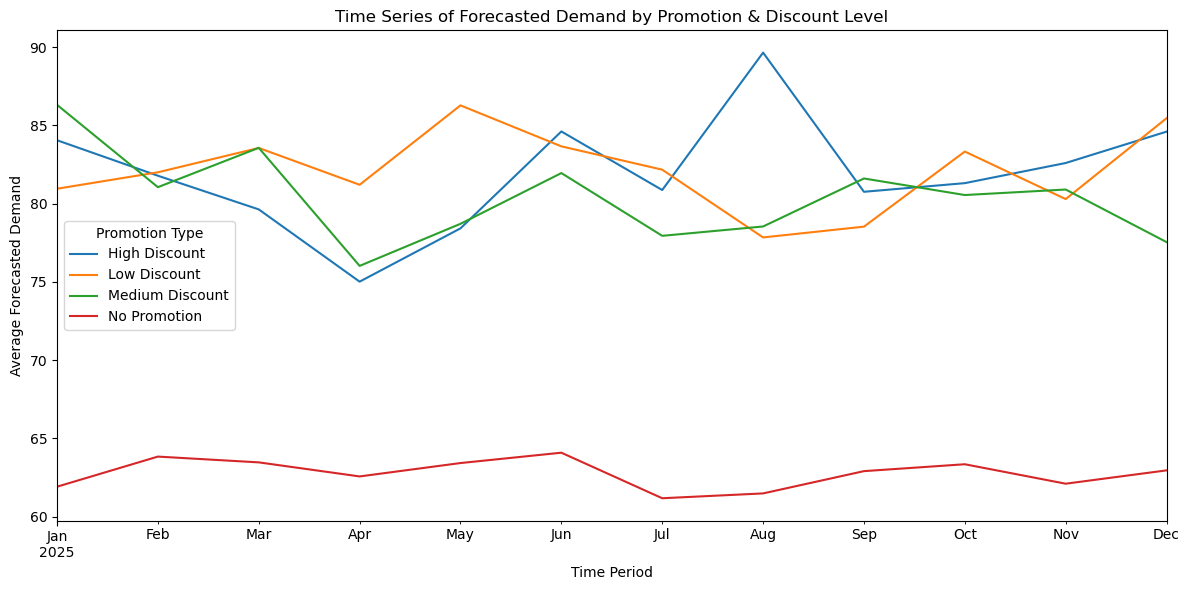

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure time_period is datetime
forecast_df["time_period"] = pd.to_datetime(forecast_df["time_period"])

# Create discount categories
forecast_df["promo_type"] = "No Promotion"

forecast_df.loc[
    (forecast_df["promotion_flag"] == 1) & (forecast_df["discount_percentage"] <= 10),
    "promo_type"
] = "Low Discount"

forecast_df.loc[
    (forecast_df["promotion_flag"] == 1) & 
    (forecast_df["discount_percentage"] > 10) & 
    (forecast_df["discount_percentage"] <= 20),
    "promo_type"
] = "Medium Discount"

forecast_df.loc[
    (forecast_df["promotion_flag"] == 1) & (forecast_df["discount_percentage"] > 20),
    "promo_type"
] = "High Discount"

# Aggregate demand over time by promo type
ts_data = (
    forecast_df
    .groupby(["time_period", "promo_type"])["forecasted_demand"]
    .mean()
    .reset_index()
)

# Pivot for plotting
ts_pivot = ts_data.pivot(
    index="time_period",
    columns="promo_type",
    values="forecasted_demand"
)

# Plot time series
plt.figure(figsize=(12,6))
ts_pivot.plot(ax=plt.gca())

plt.title("Time Series of Forecasted Demand by Promotion & Discount Level")
plt.ylabel("Average Forecasted Demand")
plt.xlabel("Time Period")
plt.legend(title="Promotion Type")
plt.tight_layout()
plt.show()


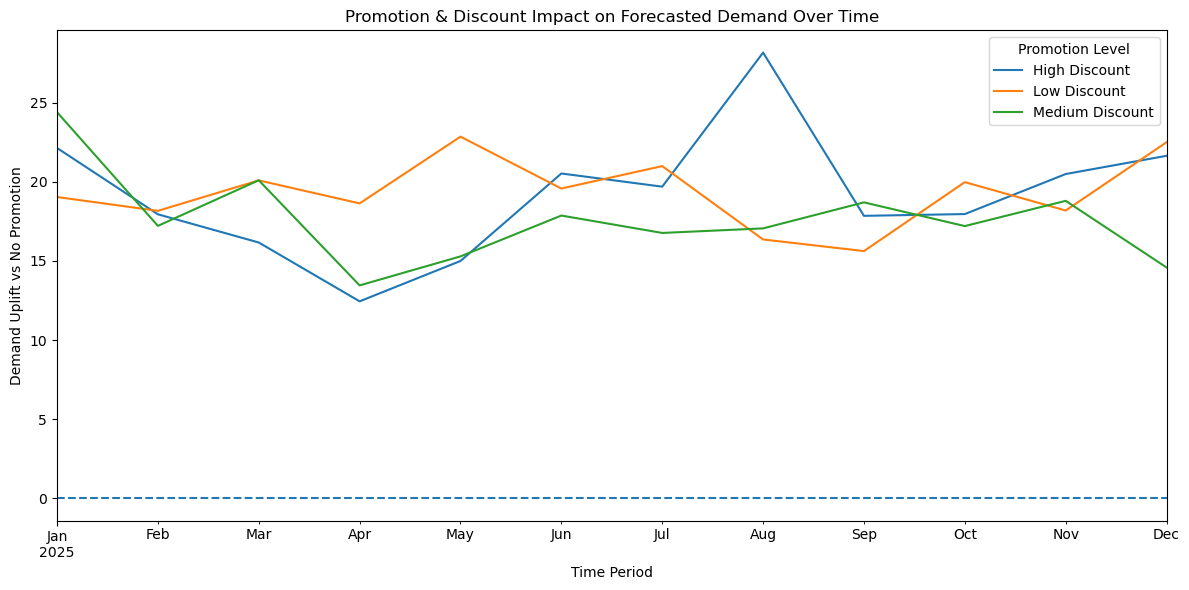

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime
forecast_df["time_period"] = pd.to_datetime(forecast_df["time_period"])

# Create promotion-discount category
forecast_df["promo_level"] = "No Promotion"
forecast_df.loc[(forecast_df["promotion_flag"] == 1) & (forecast_df["discount_percentage"] <= 10), "promo_level"] = "Low Discount"
forecast_df.loc[(forecast_df["promotion_flag"] == 1) & (forecast_df["discount_percentage"] > 10) & (forecast_df["discount_percentage"] <= 20), "promo_level"] = "Medium Discount"
forecast_df.loc[(forecast_df["promotion_flag"] == 1) & (forecast_df["discount_percentage"] > 20), "promo_level"] = "High Discount"

# Aggregate forecasted demand over time
ts = (
    forecast_df
    .groupby(["time_period", "promo_level"])["forecasted_demand"]
    .mean()
    .reset_index()
)

# Pivot
pivot = ts.pivot(index="time_period", columns="promo_level", values="forecasted_demand")

# Convert to uplift vs no promotion
uplift = pivot.sub(pivot["No Promotion"], axis=0)

# Plot
plt.figure(figsize=(12,6))
uplift.drop(columns=["No Promotion"]).plot(ax=plt.gca())
plt.axhline(0, linestyle="--")

plt.title("Promotion & Discount Impact on Forecasted Demand Over Time")
plt.ylabel("Demand Uplift vs No Promotion")
plt.xlabel("Time Period")
plt.legend(title="Promotion Level")
plt.tight_layout()
plt.show()


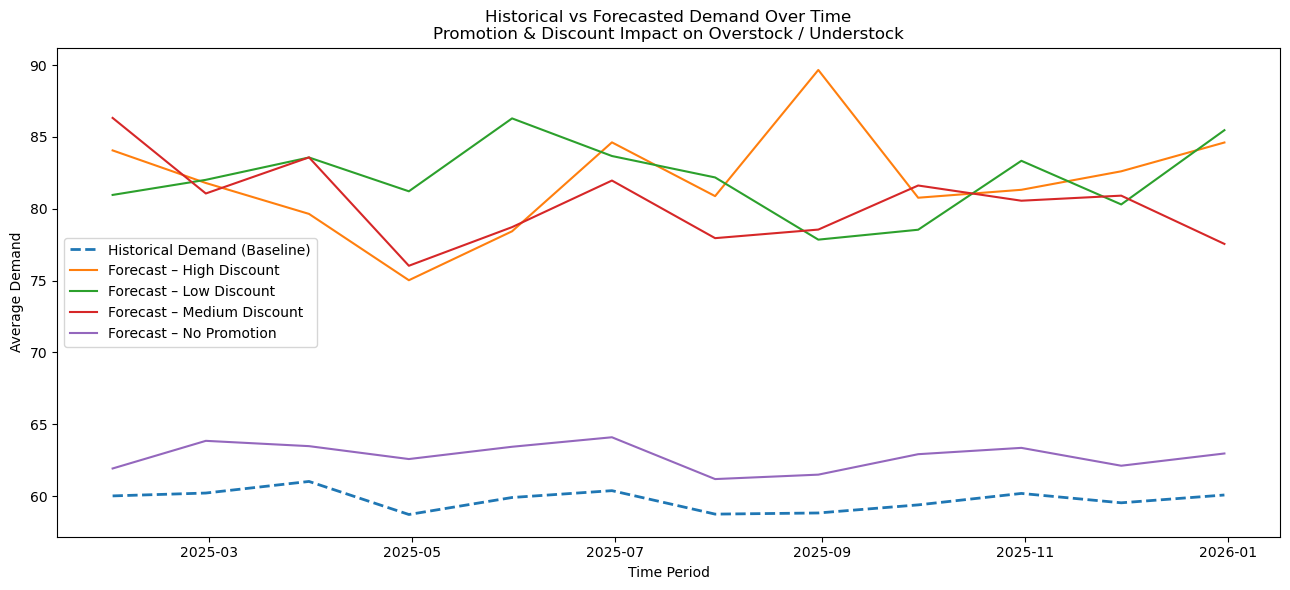

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime
demand_df["time_period"] = pd.to_datetime(demand_df["time_period"])
forecast_df["time_period"] = pd.to_datetime(forecast_df["time_period"])

# ---- Historical demand (base) ----
hist_ts = (
    demand_df
    .groupby("time_period")["base_demand"]
    .mean()
)

# ---- Promotion / discount categories ----
forecast_df["promo_level"] = "No Promotion"
forecast_df.loc[(forecast_df["promotion_flag"] == 1) & (forecast_df["discount_percentage"] <= 10), "promo_level"] = "Low Discount"
forecast_df.loc[(forecast_df["promotion_flag"] == 1) & (forecast_df["discount_percentage"] > 10) & (forecast_df["discount_percentage"] <= 20), "promo_level"] = "Medium Discount"
forecast_df.loc[(forecast_df["promotion_flag"] == 1) & (forecast_df["discount_percentage"] > 20), "promo_level"] = "High Discount"

# ---- Forecasted demand over time ----
fc_ts = (
    forecast_df
    .groupby(["time_period", "promo_level"])["forecasted_demand"]
    .mean()
    .reset_index()
    .pivot(index="time_period", columns="promo_level", values="forecasted_demand")
)

# ---- Plot ----
plt.figure(figsize=(13,6))

# Historical baseline
plt.plot(hist_ts.index, hist_ts.values, linestyle="--", linewidth=2, label="Historical Demand (Baseline)")

# Forecasted lines
for col in fc_ts.columns:
    plt.plot(fc_ts.index, fc_ts[col], label=f"Forecast – {col}")

plt.title("Historical vs Forecasted Demand Over Time\nPromotion & Discount Impact on Overstock / Understock")
plt.xlabel("Time Period")
plt.ylabel("Average Demand")
plt.legend()
plt.tight_layout()
plt.show()


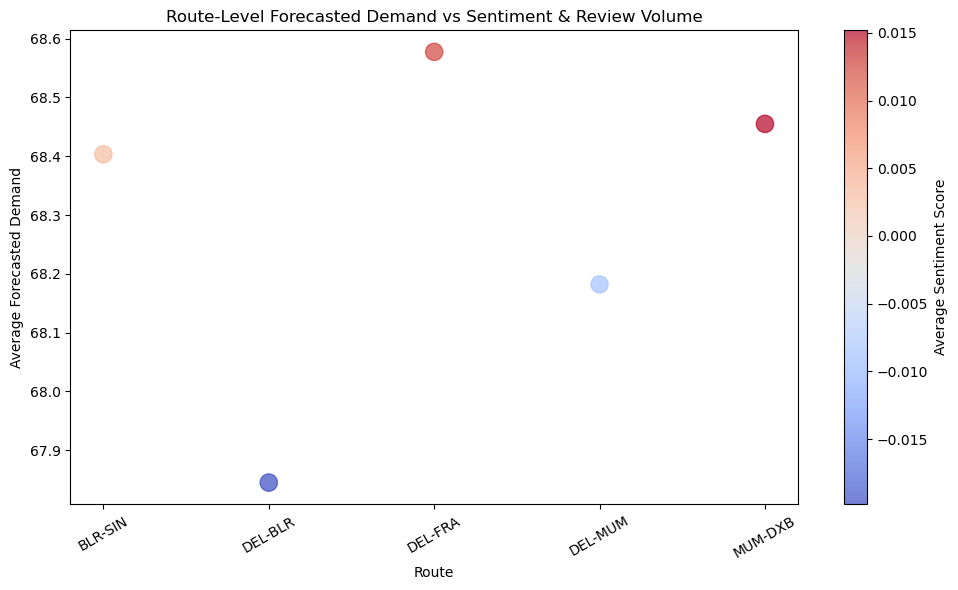

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate by route
route_sentiment = (
    forecast_df
    .groupby("route")
    .agg(
        avg_forecast_demand=("forecasted_demand", "mean"),
        avg_sentiment=("sentiment_score", "mean"),
        avg_reviews=("review_volume", "mean")
    )
    .reset_index()
)

# Plot
plt.figure(figsize=(10,6))

scatter = plt.scatter(
    route_sentiment["route"],
    route_sentiment["avg_forecast_demand"],
    s=route_sentiment["avg_reviews"],      # bubble size = review volume
    c=route_sentiment["avg_sentiment"],    # color = sentiment
    cmap="coolwarm",
    alpha=0.7
)

plt.colorbar(scatter, label="Average Sentiment Score")
plt.xlabel("Route")
plt.ylabel("Average Forecasted Demand")
plt.title("Route-Level Forecasted Demand vs Sentiment & Review Volume")

plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


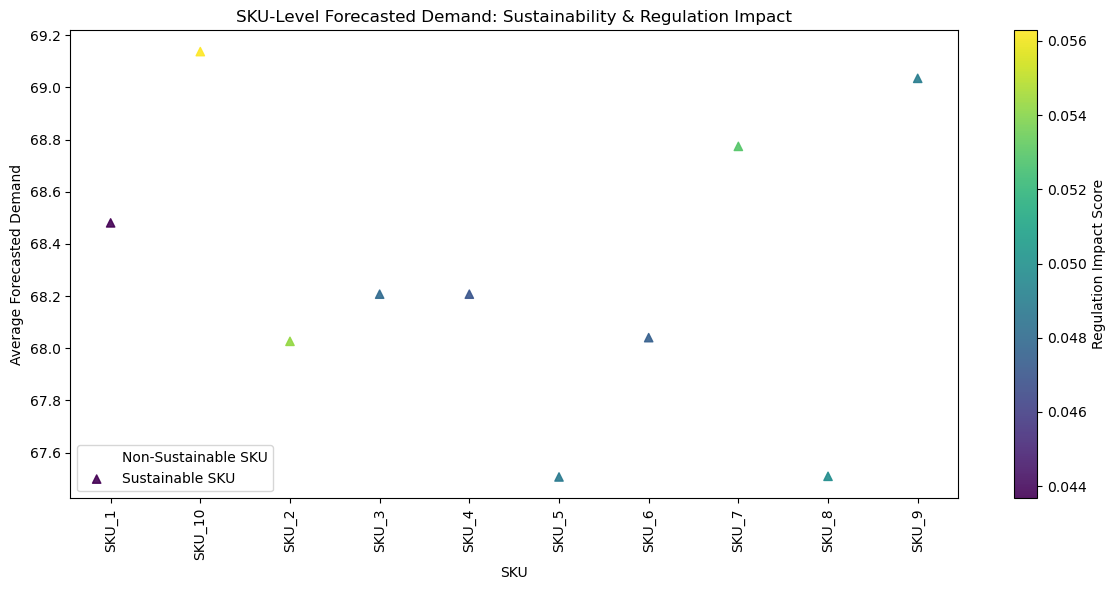

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Aggregate at SKU level
sku_analysis = (
    forecast_df
    .groupby("sku_id")
    .agg(
        avg_forecast_demand=("forecasted_demand", "mean"),
        avg_regulation_impact=("regulation_impact_score", "mean"),
        sustainable_flag=("sustainable_sku_flag", "max")
    )
    .reset_index()
)

# Separate sustainable vs non-sustainable
sust = sku_analysis[sku_analysis["sustainable_flag"] == 1]
non_sust = sku_analysis[sku_analysis["sustainable_flag"] == 0]

# Plot
plt.figure(figsize=(12,6))

plt.scatter(
    non_sust["sku_id"],
    non_sust["avg_forecast_demand"],
    c=non_sust["avg_regulation_impact"],
    cmap="viridis",
    alpha=0.7,
    label="Non-Sustainable SKU"
)

plt.scatter(
    sust["sku_id"],
    sust["avg_forecast_demand"],
    c=sust["avg_regulation_impact"],
    cmap="viridis",
    marker="^",
    alpha=0.9,
    label="Sustainable SKU"
)

plt.colorbar(label="Regulation Impact Score")
plt.xlabel("SKU")
plt.ylabel("Average Forecasted Demand")
plt.title("SKU-Level Forecasted Demand: Sustainability & Regulation Impact")
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Partha\AppData\Local\Temp\ipykernel_9116\1335497159.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels, showfliers=True)


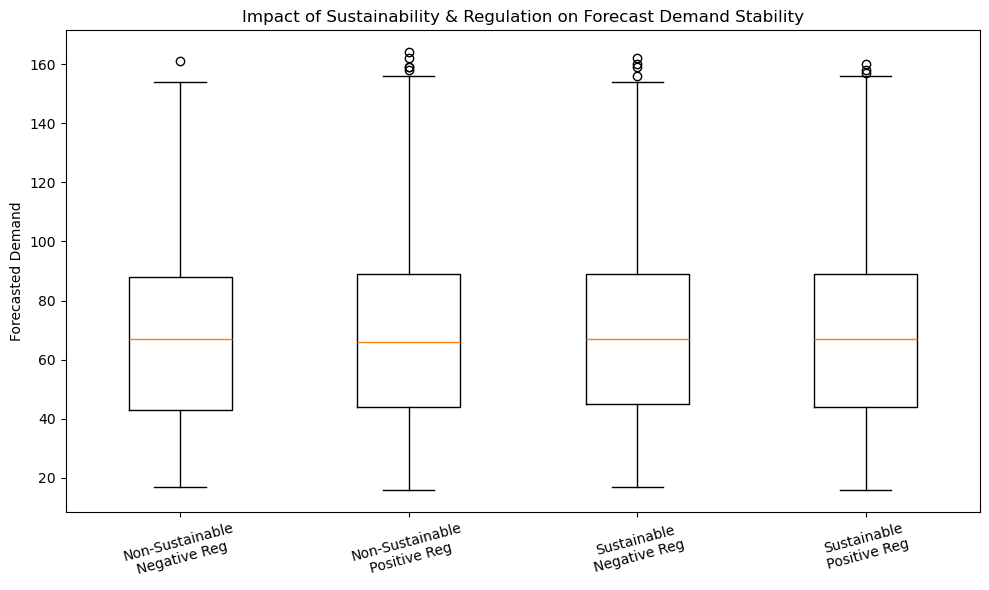

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Create regulation bucket
forecast_df["regulation_bucket"] = pd.cut(
    forecast_df["regulation_impact_score"],
    bins=[-1, -0.05, 0.05, 1],
    labels=["Negative Regulation", "Neutral Regulation", "Positive Regulation"]
)

# Filter only clear regulation signals
df_plot = forecast_df[forecast_df["regulation_bucket"].notna()]

# Prepare data
groups = [
    df_plot[(df_plot["sustainable_sku_flag"] == 0) & (df_plot["regulation_bucket"] == "Negative Regulation")]["forecasted_demand"],
    df_plot[(df_plot["sustainable_sku_flag"] == 0) & (df_plot["regulation_bucket"] == "Positive Regulation")]["forecasted_demand"],
    df_plot[(df_plot["sustainable_sku_flag"] == 1) & (df_plot["regulation_bucket"] == "Negative Regulation")]["forecasted_demand"],
    df_plot[(df_plot["sustainable_sku_flag"] == 1) & (df_plot["regulation_bucket"] == "Positive Regulation")]["forecasted_demand"],
]

labels = [
    "Non-Sustainable\nNegative Reg",
    "Non-Sustainable\nPositive Reg",
    "Sustainable\nNegative Reg",
    "Sustainable\nPositive Reg"
]

# Plot
plt.figure(figsize=(10,6))
plt.boxplot(groups, labels=labels, showfliers=True)

plt.ylabel("Forecasted Demand")
plt.title("Impact of Sustainability & Regulation on Forecast Demand Stability")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


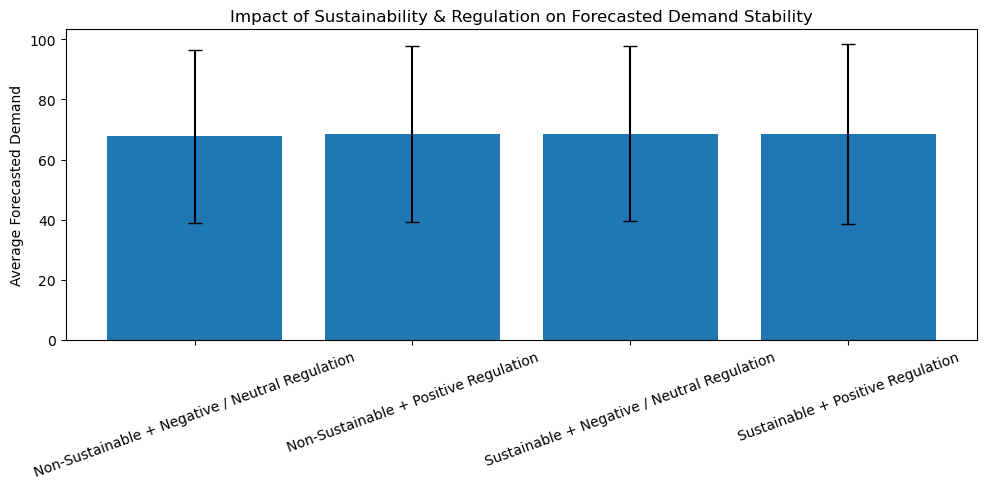

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Create regulation category
forecast_df["regulation_type"] = forecast_df["regulation_impact_score"].apply(
    lambda x: "Positive Regulation" if x > 0 else "Negative / Neutral Regulation"
)

# Aggregate
agg = (
    forecast_df
    .groupby(["sustainable_sku_flag", "regulation_type"])
    .agg(
        mean_demand=("forecasted_demand", "mean"),
        demand_std=("forecasted_demand", "std")
    )
    .reset_index()
)

# Labels
agg["category"] = agg.apply(
    lambda r: (
        "Sustainable + " + r["regulation_type"]
        if r["sustainable_sku_flag"] == 1
        else "Non-Sustainable + " + r["regulation_type"]
    ),
    axis=1
)

# Plot
plt.figure(figsize=(10,5))
plt.bar(
    agg["category"],
    agg["mean_demand"],
    yerr=agg["demand_std"],
    capsize=5
)

plt.ylabel("Average Forecasted Demand")
plt.title("Impact of Sustainability & Regulation on Forecasted Demand Stability")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


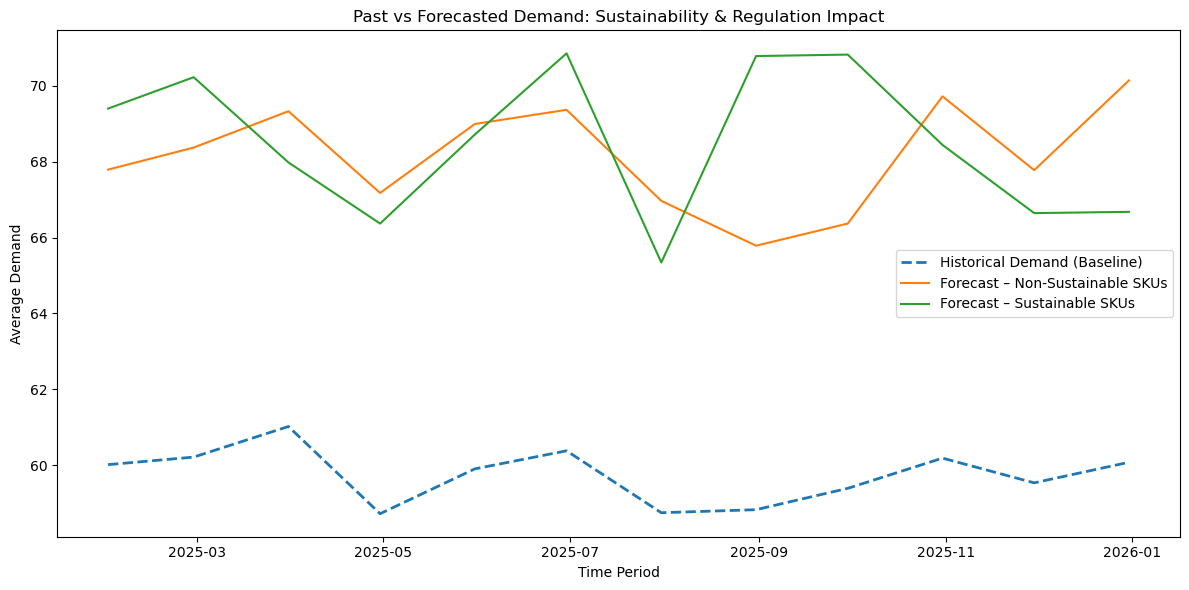

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime
demand_df["time_period"] = pd.to_datetime(demand_df["time_period"])
forecast_df["time_period"] = pd.to_datetime(forecast_df["time_period"])

# -------- Historical Demand (Baseline) --------
historical = (
    demand_df
    .groupby("time_period")["base_demand"]
    .mean()
)

# -------- Forecast Demand by Sustainability & Regulation --------
forecast_df["regulation_type"] = forecast_df["regulation_impact_score"].apply(
    lambda x: "Positive Regulation" if x > 0 else "Neutral / Negative Regulation"
)

forecast_grouped = (
    forecast_df
    .groupby(["time_period", "sustainable_sku_flag"])["forecasted_demand"]
    .mean()
    .reset_index()
)

forecast_pivot = forecast_grouped.pivot(
    index="time_period",
    columns="sustainable_sku_flag",
    values="forecasted_demand"
)

# -------- Plot --------
plt.figure(figsize=(12,6))

# Historical baseline
plt.plot(
    historical.index,
    historical.values,
    linestyle="--",
    linewidth=2,
    label="Historical Demand (Baseline)"
)

# Forecasted lines
plt.plot(
    forecast_pivot.index,
    forecast_pivot[0],
    label="Forecast – Non-Sustainable SKUs"
)

plt.plot(
    forecast_pivot.index,
    forecast_pivot[1],
    label="Forecast – Sustainable SKUs"
)

plt.title("Past vs Forecasted Demand: Sustainability & Regulation Impact")
plt.xlabel("Time Period")
plt.ylabel("Average Demand")
plt.legend()
plt.tight_layout()
plt.show()


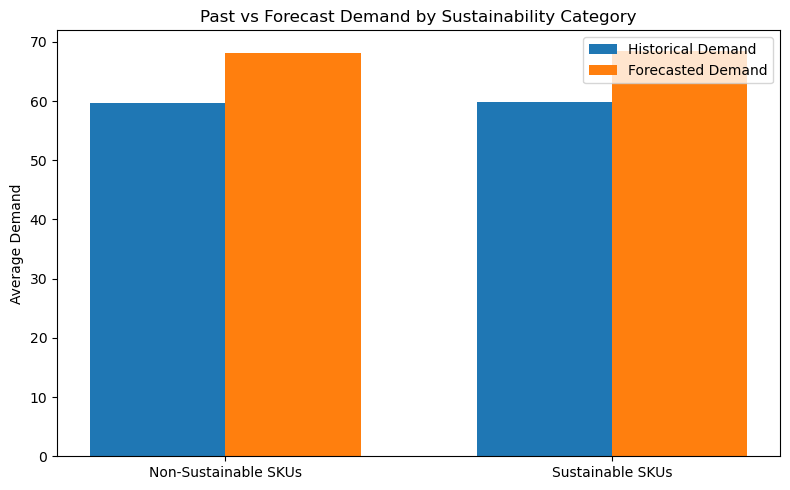

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Aggregate historical demand
historical = (
    demand_df
    .groupby("sustainable_sku_flag")["base_demand"]
    .mean()
)

# Aggregate forecasted demand
forecasted = (
    forecast_df
    .groupby("sustainable_sku_flag")["forecasted_demand"]
    .mean()
)

labels = ["Non-Sustainable SKUs", "Sustainable SKUs"]
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,5))

plt.bar(x - width/2, historical.values, width, label="Historical Demand")
plt.bar(x + width/2, forecasted.values, width, label="Forecasted Demand")

plt.ylabel("Average Demand")
plt.title("Past vs Forecast Demand by Sustainability Category")
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()


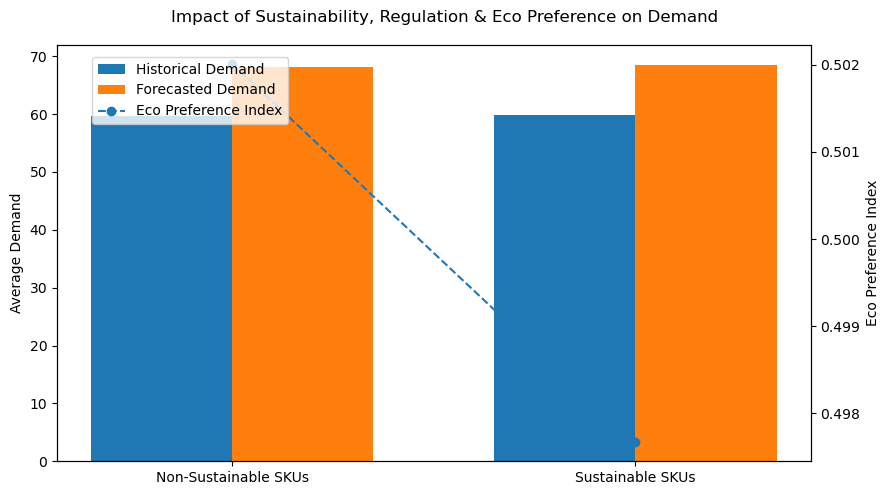

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Aggregate historical demand
hist = (
    demand_df
    .groupby("sustainable_sku_flag")["base_demand"]
    .mean()
)

# Aggregate forecasted demand and eco preference
fc = (
    forecast_df
    .groupby("sustainable_sku_flag")
    .agg(
        forecast_demand=("forecasted_demand", "mean"),
        eco_index=("eco_preference_index", "mean"),
        regulation_impact=("regulation_impact_score", "mean")
    )
)

labels = ["Non-Sustainable SKUs", "Sustainable SKUs"]
x = np.arange(len(labels))
width = 0.35

fig, ax1 = plt.subplots(figsize=(9,5))

# Bars: Past vs Forecast
ax1.bar(x - width/2, hist.values, width, label="Historical Demand")
ax1.bar(x + width/2, fc["forecast_demand"].values, width, label="Forecasted Demand")

ax1.set_ylabel("Average Demand")
ax1.set_xticks(x)
ax1.set_xticklabels(labels)

# Line: Eco Preference Index
ax2 = ax1.twinx()
ax2.plot(x, fc["eco_index"].values, marker="o", linestyle="--", label="Eco Preference Index")
ax2.set_ylabel("Eco Preference Index")

# Title & Legend
fig.suptitle("Impact of Sustainability, Regulation & Eco Preference on Demand")
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))
plt.tight_layout()
plt.show()


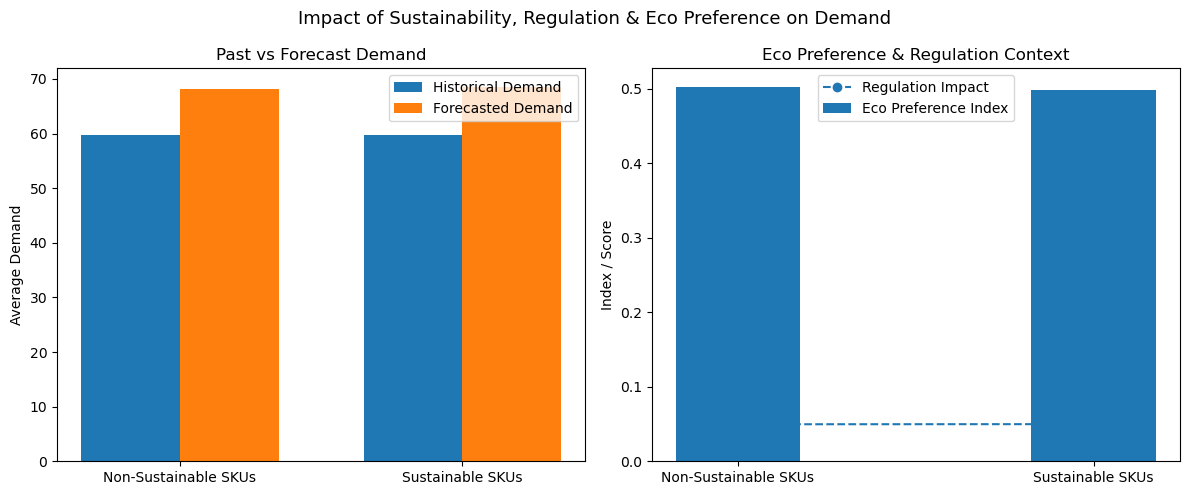

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Aggregate data
hist = demand_df.groupby("sustainable_sku_flag")["base_demand"].mean()
fc = (
    forecast_df
    .groupby("sustainable_sku_flag")
    .agg(
        forecast_demand=("forecasted_demand", "mean"),
        eco_index=("eco_preference_index", "mean"),
        regulation_impact=("regulation_impact_score", "mean")
    )
)

labels = ["Non-Sustainable SKUs", "Sustainable SKUs"]
x = np.arange(len(labels))
width = 0.35

fig, axes = plt.subplots(1, 2, figsize=(12,5))

# ---- Panel A: Past vs Forecast Demand ----
axes[0].bar(x - width/2, hist.values, width, label="Historical Demand")
axes[0].bar(x + width/2, fc["forecast_demand"].values, width, label="Forecasted Demand")

axes[0].set_xticks(x)
axes[0].set_xticklabels(labels)
axes[0].set_ylabel("Average Demand")
axes[0].set_title("Past vs Forecast Demand")
axes[0].legend()

# ---- Panel B: Eco Preference & Regulation ----
axes[1].bar(x, fc["eco_index"].values, width, label="Eco Preference Index")
axes[1].plot(x, fc["regulation_impact"].values, marker="o", linestyle="--", label="Regulation Impact")

axes[1].set_xticks(x)
axes[1].set_xticklabels(labels)
axes[1].set_ylabel("Index / Score")
axes[1].set_title("Eco Preference & Regulation Context")
axes[1].legend()

fig.suptitle("Impact of Sustainability, Regulation & Eco Preference on Demand", fontsize=13)
plt.tight_layout()
plt.show()


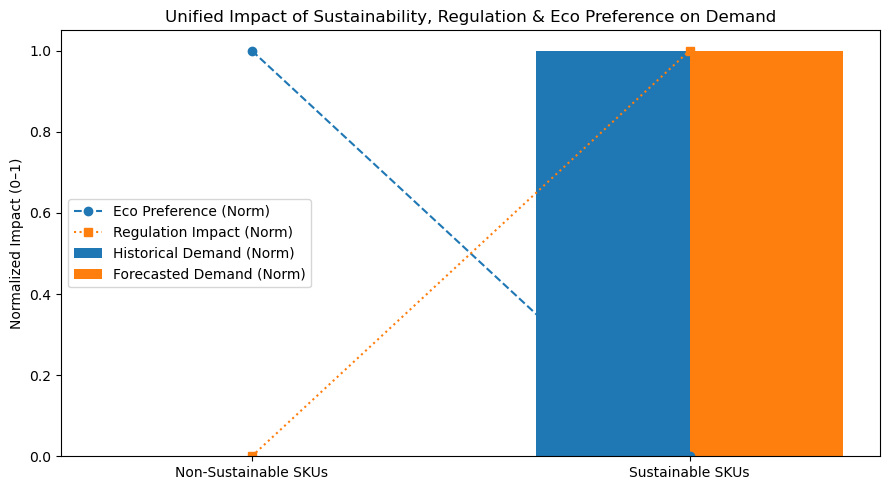

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Aggregate
agg = (
    forecast_df
    .groupby("sustainable_sku_flag")
    .agg(
        forecast_demand=("forecasted_demand", "mean"),
        eco_index=("eco_preference_index", "mean"),
        regulation_impact=("regulation_impact_score", "mean")
    )
)

hist = demand_df.groupby("sustainable_sku_flag")["base_demand"].mean()

# Normalize helper
def normalize(series):
    return (series - series.min()) / (series.max() - series.min())

# Normalize all
agg["forecast_norm"] = normalize(agg["forecast_demand"])
agg["eco_norm"] = normalize(agg["eco_index"])
agg["reg_norm"] = normalize(agg["regulation_impact"])
hist_norm = normalize(hist)

labels = ["Non-Sustainable SKUs", "Sustainable SKUs"]
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(9,5))

# Bars
plt.bar(x - width/2, hist_norm.values, width, label="Historical Demand (Norm)")
plt.bar(x + width/2, agg["forecast_norm"].values, width, label="Forecasted Demand (Norm)")

# Lines
plt.plot(x, agg["eco_norm"].values, marker="o", linestyle="--", label="Eco Preference (Norm)")
plt.plot(x, agg["reg_norm"].values, marker="s", linestyle=":", label="Regulation Impact (Norm)")

plt.xticks(x, labels)
plt.ylabel("Normalized Impact (0–1)")
plt.title("Unified Impact of Sustainability, Regulation & Eco Preference on Demand")
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\Partha\AppData\Local\Temp\ipykernel_9116\4115724187.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["sentiment_bucket", "review_bucket"])["forecasted_demand"]
C:\Users\Partha\AppData\Local\Temp\ipykernel_9116\4115724187.py:32: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["sentiment_bucket", "review_bucket"])["base_demand"]


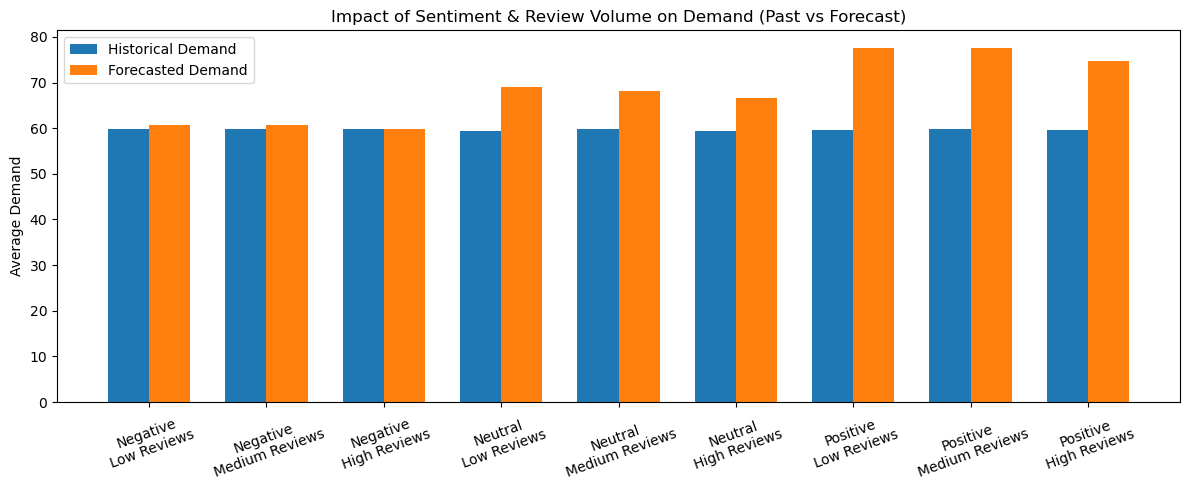

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create sentiment buckets
forecast_df["sentiment_bucket"] = pd.cut(
    forecast_df["sentiment_score"],
    bins=[-1, -0.2, 0.2, 1],
    labels=["Negative", "Neutral", "Positive"]
)

# Create review volume buckets
forecast_df["review_bucket"] = pd.cut(
    forecast_df["review_volume"],
    bins=[0, 50, 200, 1000],
    labels=["Low Reviews", "Medium Reviews", "High Reviews"]
)

# Aggregate forecast demand
fc = (
    forecast_df
    .groupby(["sentiment_bucket", "review_bucket"])["forecasted_demand"]
    .mean()
    .reset_index()
)

# Aggregate historical demand (baseline)
hist = (
    demand_df
    .merge(forecast_df[["customer_id", "sku_id", "sentiment_bucket", "review_bucket"]],
           on=["customer_id", "sku_id"])
    .groupby(["sentiment_bucket", "review_bucket"])["base_demand"]
    .mean()
    .reset_index()
)

# Merge past vs forecast
merged = pd.merge(fc, hist, on=["sentiment_bucket", "review_bucket"])

# Prepare plot
labels = merged["sentiment_bucket"].astype(str) + "\n" + merged["review_bucket"].astype(str)
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(12,5))
plt.bar(x - width/2, merged["base_demand"], width, label="Historical Demand")
plt.bar(x + width/2, merged["forecasted_demand"], width, label="Forecasted Demand")

plt.xticks(x, labels, rotation=20)
plt.ylabel("Average Demand")
plt.title("Impact of Sentiment & Review Volume on Demand (Past vs Forecast)")
plt.legend()
plt.tight_layout()
plt.show()


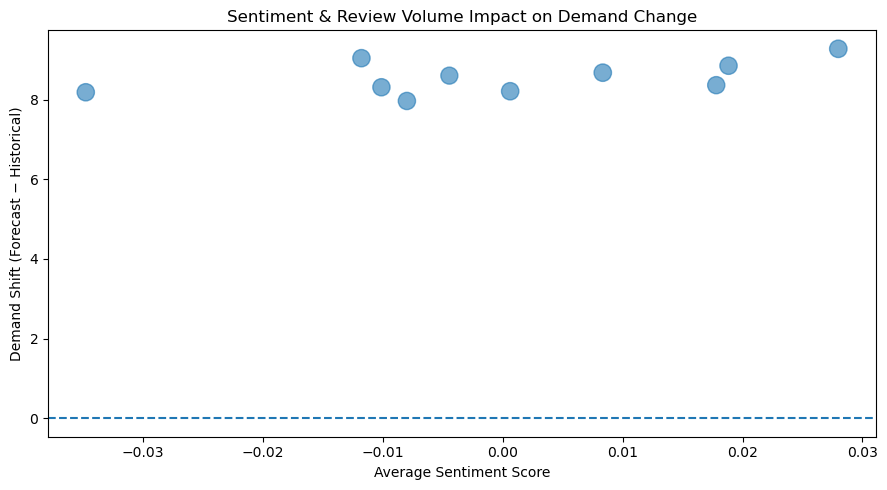

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Select only required columns before merge
base = demand_df[["customer_id", "sku_id", "time_period", "base_demand"]]
forecast = forecast_df[[
    "customer_id", "sku_id", "time_period",
    "forecasted_demand", "sentiment_score", "review_volume"
]]

# Merge
merged = pd.merge(
    base,
    forecast,
    on=["customer_id", "sku_id", "time_period"],
    how="inner"
)

# Demand shift
merged["demand_shift"] = merged["forecasted_demand"] - merged["base_demand"]

# Aggregate for clean visualization
plot_df = (
    merged
    .groupby("sku_id")
    .agg(
        sentiment=("sentiment_score", "mean"),
        review_volume=("review_volume", "mean"),
        demand_shift=("demand_shift", "mean")
    )
    .reset_index()
)

# Scatter plot
plt.figure(figsize=(9,5))
plt.scatter(
    plot_df["sentiment"],
    plot_df["demand_shift"],
    s=plot_df["review_volume"],
    alpha=0.6
)

plt.axhline(0, linestyle="--")
plt.xlabel("Average Sentiment Score")
plt.ylabel("Demand Shift (Forecast − Historical)")
plt.title("Sentiment & Review Volume Impact on Demand Change")
plt.tight_layout()
plt.show()



C:\Users\Partha\AppData\Local\Temp\ipykernel_9116\2503428872.py:34: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["sentiment_bucket", "review_bucket"])["demand_lift"]


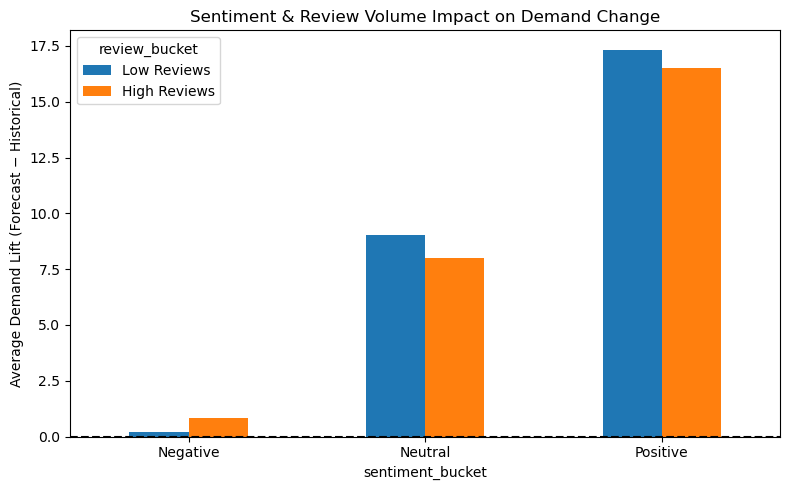

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Merge required columns safely
base = demand_df[["customer_id", "sku_id", "time_period", "base_demand"]]
fc = forecast_df[[
    "customer_id", "sku_id", "time_period",
    "forecasted_demand", "sentiment_score", "review_volume"
]]

df = pd.merge(base, fc, on=["customer_id", "sku_id", "time_period"], how="inner")

# Demand lift
df["demand_lift"] = df["forecasted_demand"] - df["base_demand"]

# Sentiment buckets
df["sentiment_bucket"] = pd.cut(
    df["sentiment_score"],
    bins=[-1, -0.2, 0.2, 1],
    labels=["Negative", "Neutral", "Positive"]
)

# Review volume buckets
df["review_bucket"] = pd.cut(
    df["review_volume"],
    bins=[0, 100, 1000],
    labels=["Low Reviews", "High Reviews"]
)

# Aggregate
agg = (
    df
    .groupby(["sentiment_bucket", "review_bucket"])["demand_lift"]
    .mean()
    .unstack()
)

# Plot
agg.plot(
    kind="bar",
    figsize=(8,5)
)

plt.axhline(0, linestyle="--", color="black")
plt.ylabel("Average Demand Lift (Forecast − Historical)")
plt.title("Sentiment & Review Volume Impact on Demand Change")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


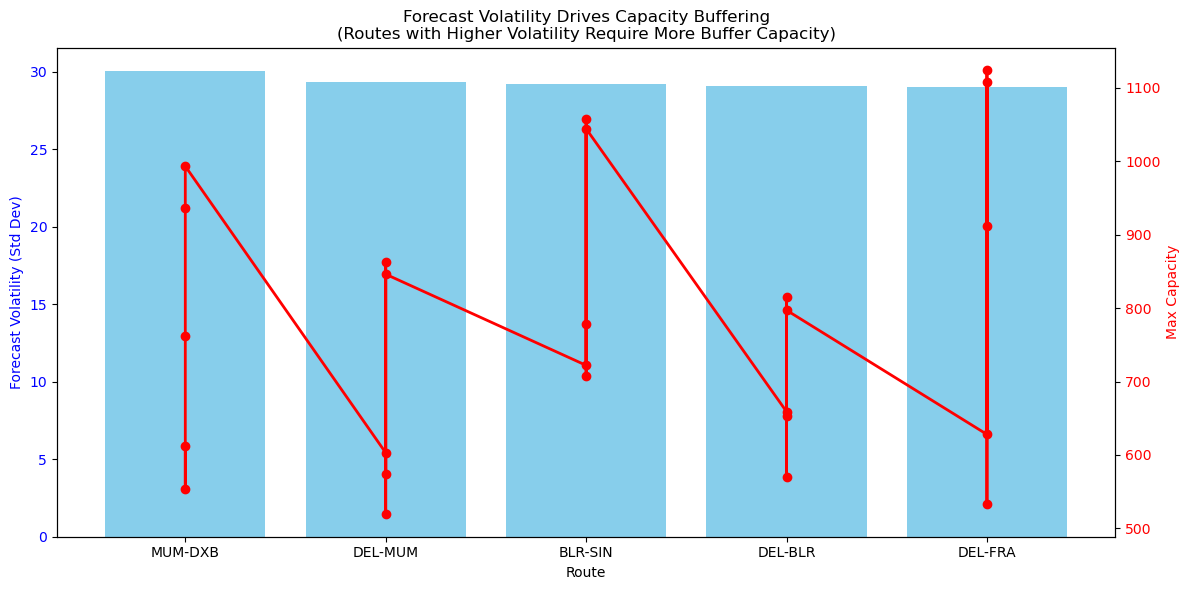

In [35]:
# Merge with capacity data
merged = pd.merge(volatility, capacity_df[['route', 'max_capacity']], on='route')

# Sort by volatility descending to highlight high-volatility routes
merged = merged.sort_values('volatility', ascending=False)

# Plot: Bar chart for volatility, line for capacity
fig, ax1 = plt.subplots(figsize=(12,6))

ax1.bar(merged['route'], merged['volatility'], color='skyblue', alpha=0.7, label='Forecast Volatility (Std Dev)')
ax1.set_ylabel('Forecast Volatility (Std Dev)', color='blue')
ax1.set_xlabel('Route')
ax1.set_title('Forecast Volatility Drives Capacity Buffering\n(Routes with Higher Volatility Require More Buffer Capacity)')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(merged['route'], merged['max_capacity'], color='red', marker='o', linestyle='-', linewidth=2, label='Max Capacity')
ax2.set_ylabel('Max Capacity', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.xticks(rotation=45)
fig.tight_layout()
plt.show()

Forecast Volatility and Capacity per Route (Sorted by Highest Volatility):
This helps identify which routes are most unpredictable and may need extra capacity buffers.


,route,volatility,max_capacity
24,MUM-DXB,30.054453,612
23,MUM-DXB,30.054453,554
22,MUM-DXB,30.054453,762
21,MUM-DXB,30.054453,936
20,MUM-DXB,30.054453,993
19,DEL-MUM,29.365440,603
18,DEL-MUM,29.365440,574
17,DEL-MUM,29.365440,863
16,DEL-MUM,29.365440,519
15,DEL-MUM,29.365440,846


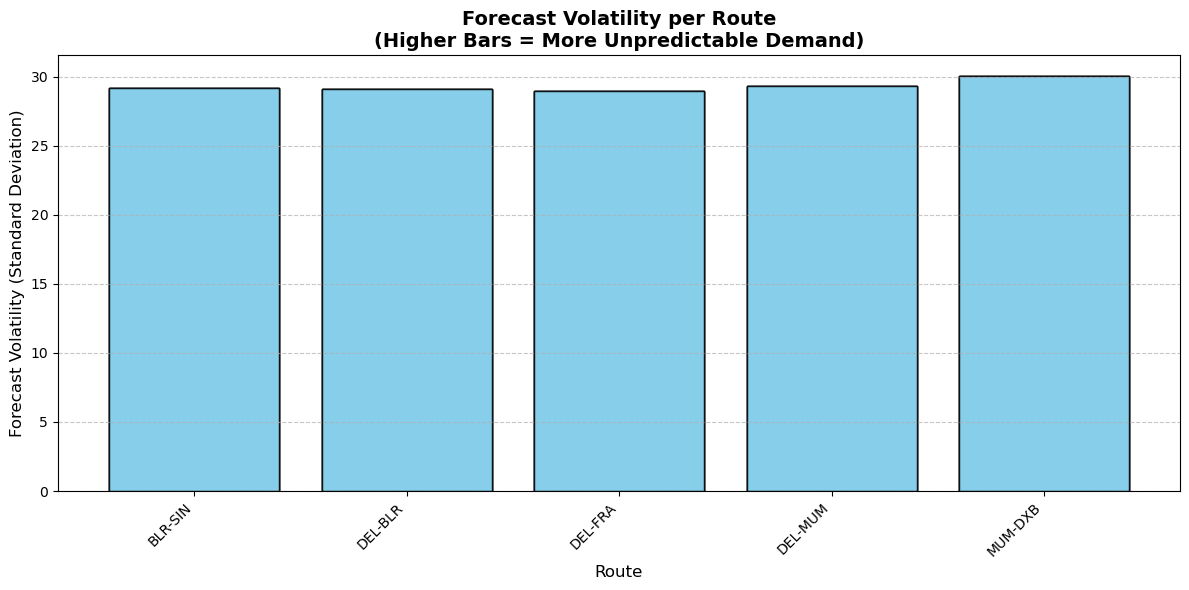


=== Key Insights on Forecast Volatility ===
- Volatility measures how much forecasted demand varies for each route.
- Routes with high volatility (e.g., spikes in demand) need more buffer capacity to avoid stockouts.
- Routes with low volatility can use fixed capacity without much extra buffer.

Do all routes have the same forecast volatility?
No, they vary significantly across routes. This variation drives different capacity planning needs.
- Highest volatility route: MUM-DXB (volatility: 30.05)
- Lowest volatility route: DEL-FRA (volatility: 29.01)
- Average volatility across all routes: 29.35
- Range of volatility: 1.05 (from lowest to highest)

=== Descriptive Statistics for Volatility ===
count    25.000000
mean     29.350286
std       0.379200
min      29.005882
25%      29.111695
50%      29.213959
75%      29.365440
max      30.054453
Name: volatility, dtype: float64


In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Calculate forecast volatility per route
# Volatility is measured as the standard deviation of forecasted demand for each route.
# Higher volatility means more unpredictable demand, which requires more buffer capacity.
volatility = forecast_df.groupby('route')['forecasted_demand'].std().reset_index()
volatility.columns = ['route', 'volatility']

# Step 2: Merge with capacity data
# Combine volatility data with flight capacity to see how they relate.
merged = pd.merge(volatility, capacity_df[['route', 'max_capacity']], on='route')

# Step 3: Display the data in a table for easy viewing
# This table shows each route's volatility and max capacity, sorted by highest volatility first.
print("Forecast Volatility and Capacity per Route (Sorted by Highest Volatility):")
print("This helps identify which routes are most unpredictable and may need extra capacity buffers.")
display(merged.sort_values('volatility', ascending=False))

# Step 4: Simple bar chart for volatility only (easier to see differences)
# The bars represent forecast volatility (std dev). Taller bars = more volatile demand.
plt.figure(figsize=(12,6))
bars = plt.bar(merged['route'], merged['volatility'], color='skyblue', edgecolor='black', alpha=0.8)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Forecast Volatility (Standard Deviation)', fontsize=12)
plt.xlabel('Route', fontsize=12)
plt.title('Forecast Volatility per Route\n(Higher Bars = More Unpredictable Demand)', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 5: Key insights and answer to the question
print("\n=== Key Insights on Forecast Volatility ===")
print("- Volatility measures how much forecasted demand varies for each route.")
print("- Routes with high volatility (e.g., spikes in demand) need more buffer capacity to avoid stockouts.")
print("- Routes with low volatility can use fixed capacity without much extra buffer.")
print("\nDo all routes have the same forecast volatility?")
print("No, they vary significantly across routes. This variation drives different capacity planning needs.")
print(f"- Highest volatility route: {merged.loc[merged['volatility'].idxmax(), 'route']} (volatility: {merged['volatility'].max():.2f})")
print(f"- Lowest volatility route: {merged.loc[merged['volatility'].idxmin(), 'route']} (volatility: {merged['volatility'].min():.2f})")
print(f"- Average volatility across all routes: {merged['volatility'].mean():.2f}")
print(f"- Range of volatility: {merged['volatility'].max() - merged['volatility'].min():.2f} (from lowest to highest)")

# Additional descriptive stats
print("\n=== Descriptive Statistics for Volatility ===")
print(merged['volatility'].describe())

Average Forecast Demand by Cost Category:
This shows how forecasted demand varies with fixed and variable cost structures.


,cost_category,avg_forecast_demand
0,"High Fixed, High Variable",68.276071
1,"High Fixed, Low Variable",68.315750
2,"Low Fixed, High Variable",68.483333
3,"Low Fixed, Low Variable",68.173333


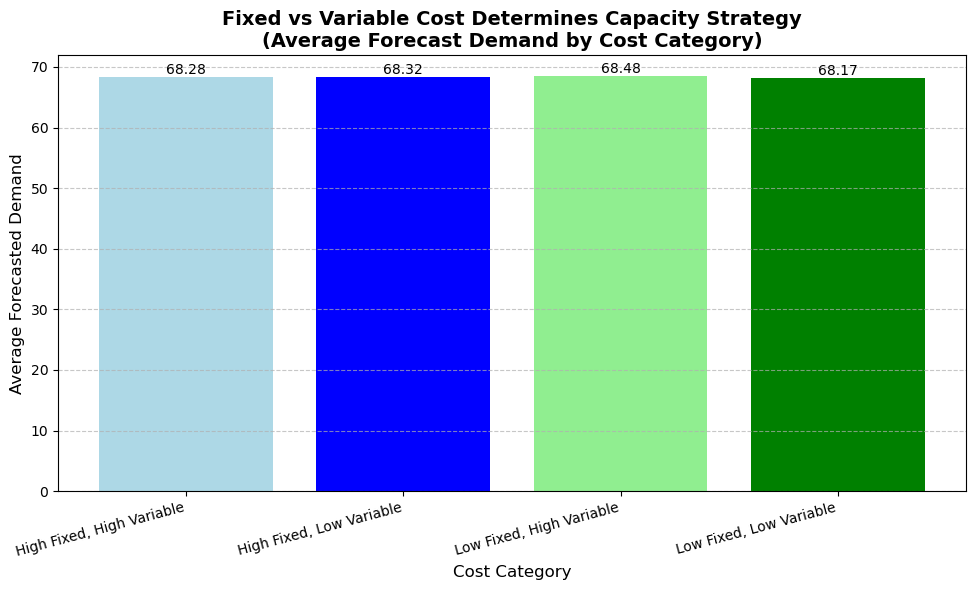

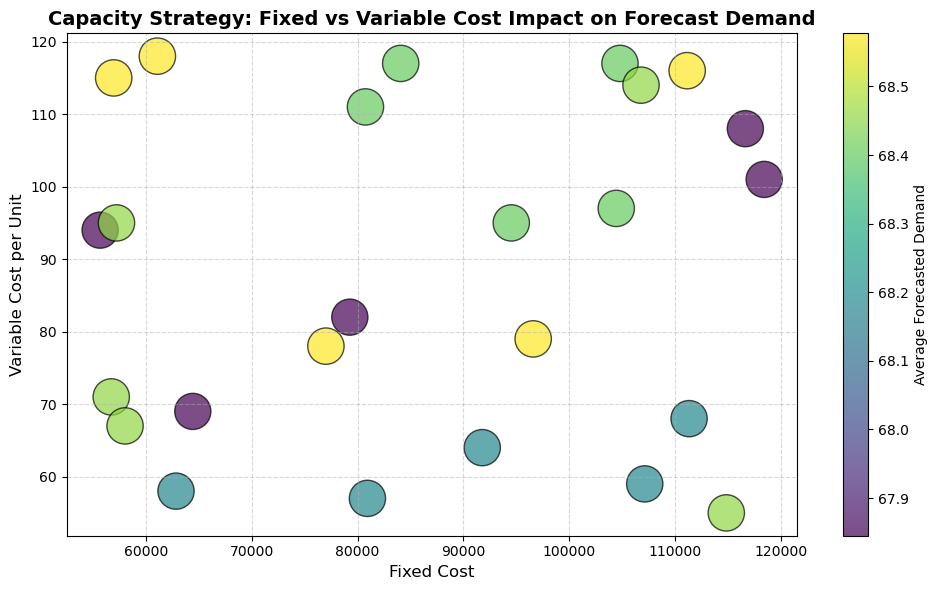


=== Key Insights on Fixed vs Variable Cost Strategy ===
- High fixed-cost routes: Maximize utilization (run full flights) when forecast demand is high.
- High variable-cost routes: Control demand intake (restrict or dynamic pricing) when forecast is uncertain.
- Low fixed, low variable: Flexible capacity planning.
- High fixed, high variable: Most sensitive to forecast accuracy for cost optimization.

Median Fixed Cost: 84074.00
Median Variable Cost: 94.00


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Calculate average forecasted demand per route
forecast_agg = forecast_df.groupby('route')['forecasted_demand'].mean().reset_index()
forecast_agg.columns = ['route', 'avg_forecast_demand']

# Step 2: Merge with capacity cost data
cost_data = capacity_df[['route', 'fixed_cost', 'variable_cost_per_unit']].drop_duplicates()
merged = pd.merge(forecast_agg, cost_data, on='route')

# Step 3: Categorize routes based on cost levels (median split for simplicity)
median_fixed = merged['fixed_cost'].median()
median_var = merged['variable_cost_per_unit'].median()

merged['cost_category'] = 'Low Fixed, Low Variable'
merged.loc[(merged['fixed_cost'] > median_fixed) & (merged['variable_cost_per_unit'] <= median_var), 'cost_category'] = 'High Fixed, Low Variable'
merged.loc[(merged['fixed_cost'] <= median_fixed) & (merged['variable_cost_per_unit'] > median_var), 'cost_category'] = 'Low Fixed, High Variable'
merged.loc[(merged['fixed_cost'] > median_fixed) & (merged['variable_cost_per_unit'] > median_var), 'cost_category'] = 'High Fixed, High Variable'

# Step 4: Aggregate average forecast demand by cost category
category_agg = merged.groupby('cost_category')['avg_forecast_demand'].mean().reset_index()

# Step 5: Display table
print("Average Forecast Demand by Cost Category:")
print("This shows how forecasted demand varies with fixed and variable cost structures.")
display(category_agg)

# Step 6: Bar chart for forecast demand by cost category
plt.figure(figsize=(10,6))
bars = plt.bar(category_agg['cost_category'], category_agg['avg_forecast_demand'], color=['lightblue', 'blue', 'lightgreen', 'green'])
plt.ylabel('Average Forecasted Demand', fontsize=12)
plt.xlabel('Cost Category', fontsize=12)
plt.title('Fixed vs Variable Cost Determines Capacity Strategy\n(Average Forecast Demand by Cost Category)', fontsize=14, fontweight='bold')
plt.xticks(rotation=15, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01, f'{height:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Step 7: Scatter plot for detailed view
plt.figure(figsize=(10,6))
scatter = plt.scatter(
    merged['fixed_cost'], 
    merged['variable_cost_per_unit'], 
    s=merged['avg_forecast_demand'] * 10,  # Bubble size proportional to demand
    c=merged['avg_forecast_demand'], 
    cmap='viridis', 
    alpha=0.7, 
    edgecolors='black'
)
plt.colorbar(scatter, label='Average Forecasted Demand')
plt.xlabel('Fixed Cost', fontsize=12)
plt.ylabel('Variable Cost per Unit', fontsize=12)
plt.title('Capacity Strategy: Fixed vs Variable Cost Impact on Forecast Demand', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Step 8: Key insights
print("\n=== Key Insights on Fixed vs Variable Cost Strategy ===")
print("- High fixed-cost routes: Maximize utilization (run full flights) when forecast demand is high.")
print("- High variable-cost routes: Control demand intake (restrict or dynamic pricing) when forecast is uncertain.")
print("- Low fixed, low variable: Flexible capacity planning.")
print("- High fixed, high variable: Most sensitive to forecast accuracy for cost optimization.")
print(f"\nMedian Fixed Cost: {median_fixed:.2f}")
print(f"Median Variable Cost: {median_var:.2f}")

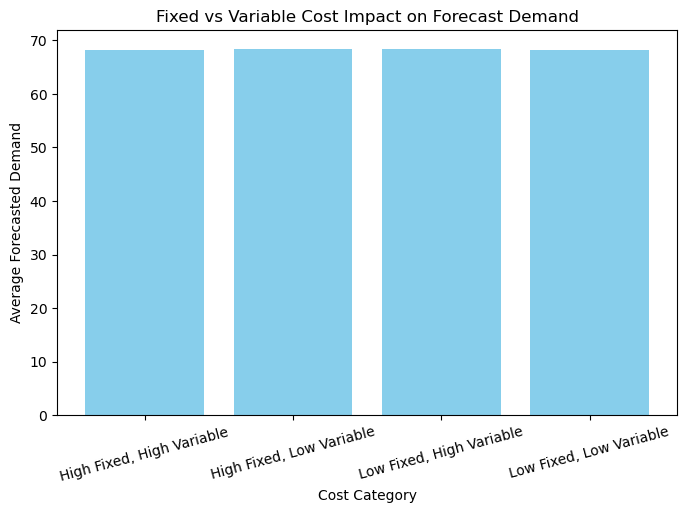

High fixed-cost routes need high demand to cover costs. High variable-cost routes need careful demand control.


In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate average forecasted demand per route
forecast_agg = forecast_df.groupby('route')['forecasted_demand'].mean().reset_index()
forecast_agg.columns = ['route', 'avg_forecast_demand']

# Merge with cost data
cost_data = capacity_df[['route', 'fixed_cost', 'variable_cost_per_unit']].drop_duplicates()
merged = pd.merge(forecast_agg, cost_data, on='route')

# Categorize routes by cost levels
median_fixed = merged['fixed_cost'].median()
median_var = merged['variable_cost_per_unit'].median()

merged['cost_category'] = 'Low Fixed, Low Variable'
merged.loc[(merged['fixed_cost'] > median_fixed) & (merged['variable_cost_per_unit'] <= median_var), 'cost_category'] = 'High Fixed, Low Variable'
merged.loc[(merged['fixed_cost'] <= median_fixed) & (merged['variable_cost_per_unit'] > median_var), 'cost_category'] = 'Low Fixed, High Variable'
merged.loc[(merged['fixed_cost'] > median_fixed) & (merged['variable_cost_per_unit'] > median_var), 'cost_category'] = 'High Fixed, High Variable'

# Aggregate forecast demand by category
category_agg = merged.groupby('cost_category')['avg_forecast_demand'].mean().reset_index()

# Simple bar chart
plt.figure(figsize=(8,5))
plt.bar(category_agg['cost_category'], category_agg['avg_forecast_demand'], color='skyblue')
plt.ylabel('Average Forecasted Demand')
plt.xlabel('Cost Category')
plt.title('Fixed vs Variable Cost Impact on Forecast Demand')
plt.xticks(rotation=15)
plt.show()

print("High fixed-cost routes need high demand to cover costs. High variable-cost routes need careful demand control.")